# Aim


`create/train random forests model and desicion trees`   
`RMSE – shows error about how my model Works,  because we are doing regression not classfication, our aim to predict.`   
`create feature importance – how often the feature is used in the model for the predict`   
`we want to see what paramters are more important? Visualise importance of features, how much you can predict that`  


### Import Data From Excel 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

data = pd.read_excel('input_data/all_meta_data.xlsx') #, index_col=0
data.head()

,Country,Pub. with AMR and Country,Pub. With Country,Relative Importance,TF \n(pub. counts with keyword/total with keywords),IDF \nlog(total pub./pub. with keywords),TF-IDF,(P01A) Agents against amoebiasis and other protozoal diseases,(P01A) %,(J01X) Other antibacterials,...,Life expectancy at birth Male years,Life expectancy at birth female years,Women who were first married by age 18 % of women ages 20-24,"Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",Wage and salary workers Male % of male employment,Wage and salaried workers female % of females employment,Firms with female participation in ownership % of firms,Female share of employment in senior and middle management %,Women in parliaments % of total seats
0,Latvia,16,467,0.034261,0.003965,2.916680,0.011566,2.29,0.172,0.50,...,69.8,79.7,0.0,94.1,92.5,86.6,90.3,41.6,44.1,30
1,Portugal,102,3932,0.025941,0.025279,1.991384,0.050340,0.80,0.045,1.16,...,78.4,84.6,0.0,94.2,90.6,79.3,87.6,0.0,30.4,36
2,"Iran, Islamic Rep.",307,16941,0.018122,0.076084,1.357058,0.103251,2.59,0.066,0.33,...,75.2,77.4,17.0,96.5,91.6,54.4,56.5,0.0,0.0,6
3,Estonia,16,895,0.017877,0.003965,2.634174,0.010445,1.50,0.123,0.65,...,73.8,82.6,0.0,97.5,98.4,85.7,93.2,35.8,34.3,30
4,Kosovo,8,448,0.017857,0.001983,2.934719,0.005819,0.61,0.030,0.22,...,69.8,74.2,0.0,61.1,43.7,0.0,0.0,13.2,15.3,0


### Delete String Columns, Create X and y variables, Show distribution of y (Pub. with AMR and Country)

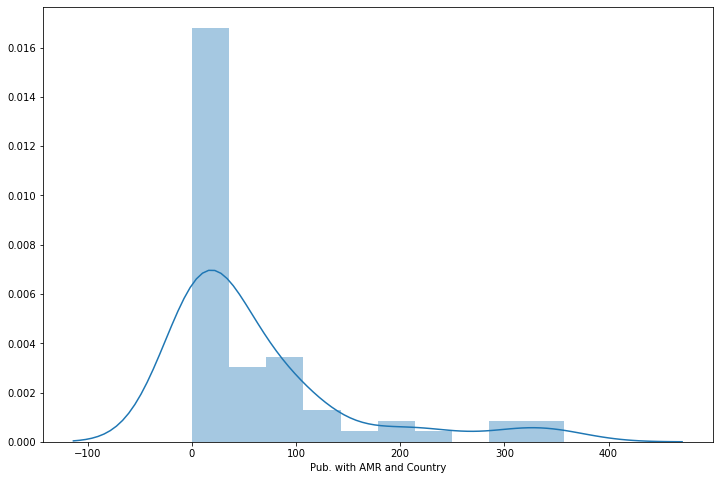

In [2]:
df = data.drop("Country", axis='columns')
#X = df.drop('Pub. with AMR and Country', axis='columns')
X = df.iloc[:,6:]
y = df['Pub. with AMR and Country']
plt.figure(figsize=(12,8))
sns.distplot(y)
plt.show()

# Adjust Limits for Random Parameters

`n_estimators` number of trees in the foreset   
`max_depth` max number of levels in each decision tree

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


# Use the random grid to search for best hyperparameters
#### First create the base model to tune
#### Random search of parameters, using 3 fold cross validation, 


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.6s finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 35, 61, 87, 113,
                                                         138, 164, 190, 216,
                                                         242, 267, 293, 319,
                                                         345, 371, 396, 422,
                                                         448, 474, 500]},
                   random_state=42, verbose=2)

### Show Best Parameters 

`test_size` use your %30 of data for the train model    
`random_state` it is used for splitting the data into training and test  
`n_estimators` number of trees in the foreset   
`max_depth` max number of levels in each decision tree

In [5]:
rf_random.best_params_ #rf_random.best_estimator_

{'n_estimators': 35,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 16,
 'bootstrap': False}

### Create RandomForest Regressor  with the best parameters
   

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=448, max_depth = 6,min_samples_leaf=2, max_features='auto',random_state=42)
rf.fit(X_train, y_train)

mae = mean_absolute_error(rf.predict(X_test), y_test)
mse = mean_squared_error(rf.predict(X_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 34.93
Mean Squared Error (MSE): 3975.21
Root Mean Squared Error (RMSE): 63.05


# Show First Estimator 

In [1]:
from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz
from io import BytesIO

d_tree1 = rf.estimators_[2]
dot_data = StringIO()
export_graphviz(d_tree1, feature_names = X.columns, out_file = dot_data, filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value = graph.create_png())
Image.open((graph.create_png())).show()

NameError: name 'rf' is not defined

# Feature importances based on Random Forest Regressor

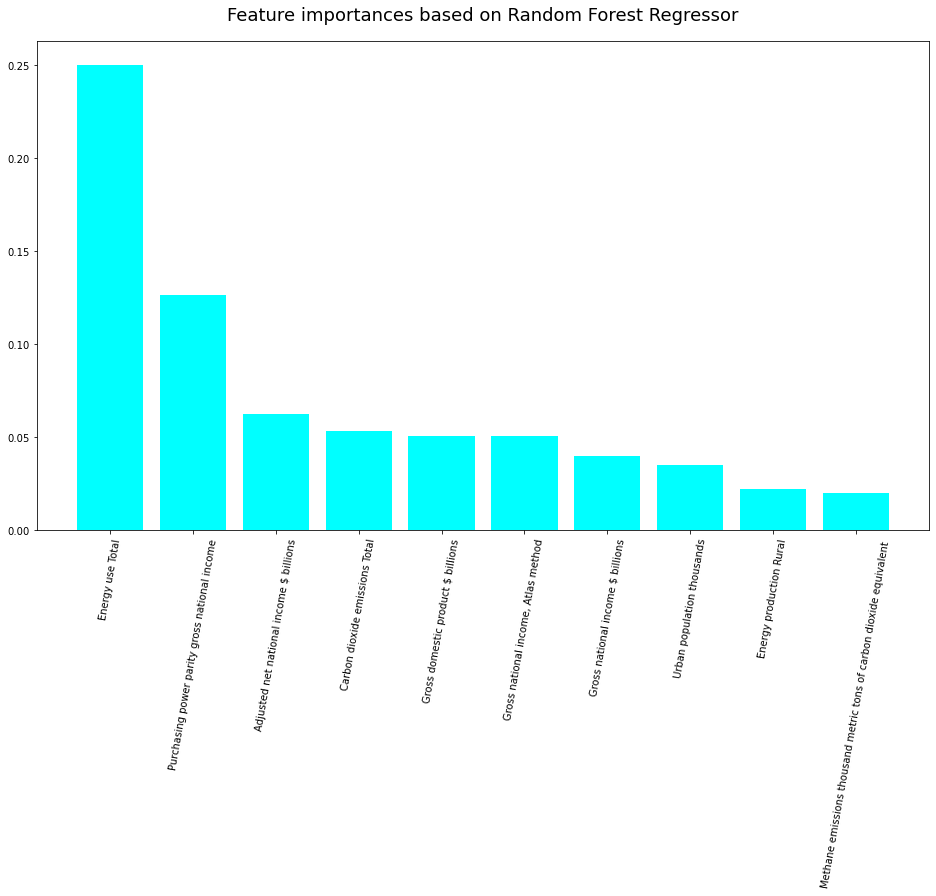

In [11]:
ranking = rf.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.figure(figsize=(16, 9))
plt.title("Feature importances based on Random Forest Regressor", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="aqua", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()